<div style='float:left'>
<img style="-webkit-user-select: none" src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/marca_UOC_web.jpg">
<h1>
B2.332-A2 C50P.R_Podado del árbol
</h1>

## Descripción:

### En este ejemplo se muestra como generar un árbol C5.0 sin y con opciones de poda.

## Procedimiento:

### Instalar los packages necesarios en caso de no haberlo hecho anteriormente

In [30]:
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
set.seed(5813)

### Carga de los datos. 

In [31]:
Alumnos_usos_sociales <-read.csv("B2.332_Students.csv",comment.char = "#")
# Reordenar al azar los datos
Alumnos_usos_sociales <- Alumnos_usos_sociales[sample(nrow(Alumnos_usos_sociales)),]
# Visualizamos el resultado 
head(Alumnos_usos_sociales)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Supera
225,GP,F,19,U,GT3,T,Secundaria,Secundaria,other,other,...,3,3,1,2,3,4,12,12,12,Si
81,GP,M,15,U,GT3,T,Grado_9,Secundaria,other,services,...,2,2,1,3,3,0,11,11,12,Si
916,GP,M,17,U,GT3,T,Secundaria,Primaria_Superior,services,other,...,4,4,3,4,5,2,9,9,10,Si
908,GP,M,18,U,GT3,T,Grado_9,Primaria_Superior,other,other,...,2,4,1,2,4,8,15,14,14,Si
211,GP,M,17,U,GT3,T,Superior,Superior,services,teacher,...,2,3,1,2,5,4,13,13,14,Si
50,GP,F,15,U,GT3,T,Superior,Superior,services,teacher,...,4,4,1,1,3,2,13,12,12,Si


### Preparamos los datos para crear el modelo y particionamos el conjunto de entrada en dos (training y test set) 

In [32]:
# Reordenar al azar los datos
Alumnos_usos_sociales <- Alumnos_usos_sociales[sample(nrow(Alumnos_usos_sociales)),]
X <- Alumnos_usos_sociales[,c("sex","age","studytime","failures","schoolsup")]
# Asignamos a Y si supera o no el curso
Y <- Alumnos_usos_sociales[,34]
# conjunto de entreno
trainX <- X[1:800,]
trainY <- Y[1:800]
# conjunto de test
testX <- X[801:1044,]
testY <- Y[801:1044]

### Creamos un primer modelo de árbol con la poda por defecto. Mostramos todas sus características.


Call:
C5.0.default(x = trainX, y = trainY)


C5.0 [Release 2.07 GPL Edition]  	Mon Apr 24 19:51:24 2017
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (6 attributes) from undefined.data

Decision tree:

failures <= 0: Si (658/102)
failures > 0:
:...failures > 2: No (23/6)
    failures <= 2:
    :...age <= 18: No (86/32)
        age > 18: Si (33/12)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     4  152(19.0%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	    71   114    (a): class No
	    38   577    (b): class Si


	Attribute usage:

	100.00%	failures
	 14.88%	age


Time: 0.0 secs



Call:
C5.0.default(x = trainX, y = trainY, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Mon Apr 24 19:51:24 2017
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (6 attributes) from undefined.data

Rules:

Rule 1: (103/38, lift 2.7)
	age <= 18
	failures > 0
	->  class No  [0.629]

Rule 2: (142/59, lift 2.5)
	failures > 0
	->  class No  [0.583]

Rule 3: (777/168, lift 1.0)
	failures <= 2
	->  class Si  [0.783]

Default class: Si


Evaluation on training data (800 cases):

	        Rules     
	  ----------------
	    No      Errors

	     3  152(19.0%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	    71   114    (a): class No
	    38   577    (b): class Si


	Attribute usage:

	100.00%	failures
	 12.88%	age


Time: 0.0 secs


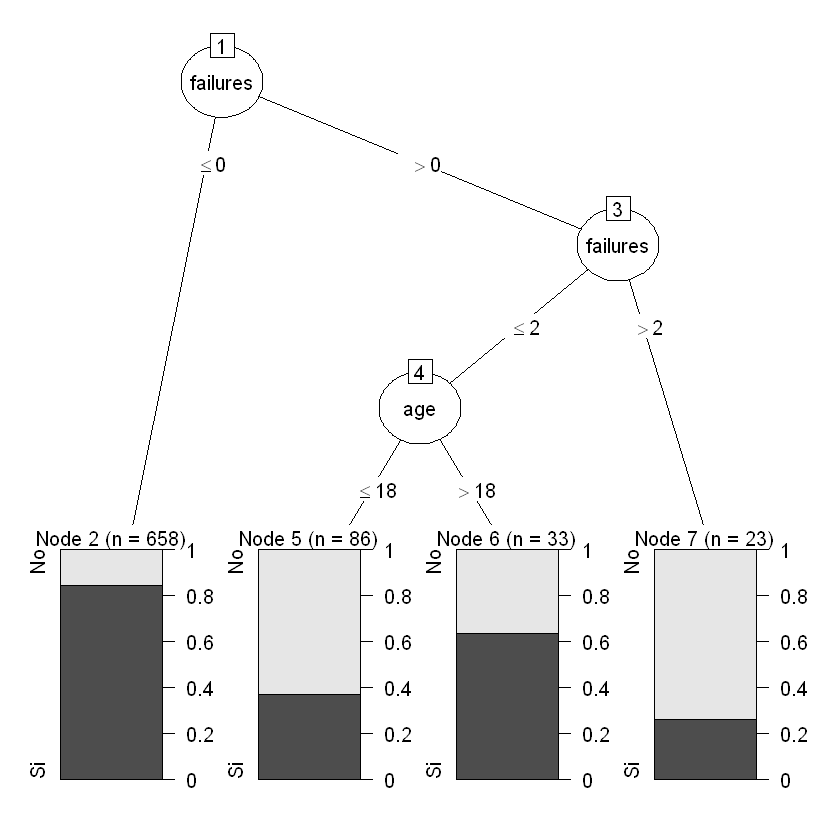

In [33]:
model <- C50::C5.0(trainX,trainY)
summary(model)
plot(model)
model <- C50::C5.0(trainX,trainY,rules=TRUE)
summary(model)

### Creamos un primer modelo de árbol sin  poda. Mostramos todas sus características.


Call:
C5.0.default(x = trainX, y = trainY, control = C5.0Control(noGlobalPruning
 = TRUE))


C5.0 [Release 2.07 GPL Edition]  	Mon Apr 24 19:51:25 2017
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (6 attributes) from undefined.data

Decision tree:

failures <= 0: Si (658/102)
failures > 0:
:...failures > 2:
    :...schoolsup = no: No (20/4)
    :   schoolsup = yes: Si (3/1)
    failures <= 2:
    :...age > 18: Si (33/12)
        age <= 18:
        :...failures > 1: No (17/2)
            failures <= 1:
            :...age <= 16: Si (24/8)
                age > 16: No (45/14)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     7  143(17.9%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	    62   123    (a): class No
	    20   595    (b): class Si


	Attribute usage:

	100.00%	failures
	 14.88%	age
	  2.88%	schoolsup


Time: 0.0 secs



Call:
C5.0.default(x = trainX, y = trainY, rules = TRUE, control
 = C5.0Control(noGlobalPruning = TRUE))


C5.0 [Release 2.07 GPL Edition]  	Mon Apr 24 19:51:25 2017
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (6 attributes) from undefined.data

Rules:

Rule 1: (17/2, lift 3.6)
	age <= 18
	failures > 1
	failures <= 2
	->  class No  [0.842]

Rule 2: (53/15, lift 3.1)
	age > 16
	age <= 18
	failures > 0
	failures <= 2
	->  class No  [0.709]

Rule 3: (142/59, lift 2.5)
	failures > 0
	->  class No  [0.583]

Rule 4: (777/168, lift 1.0)
	failures <= 2
	->  class Si  [0.783]

Default class: Si


Evaluation on training data (800 cases):

	        Rules     
	  ----------------
	    No      Errors

	     4  144(18.0%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	    63   122    (a): class No
	    22   593    (b): class Si


	Attribute usage:

	100.00%	failures
	  7.75%	age


Time: 0.0 secs


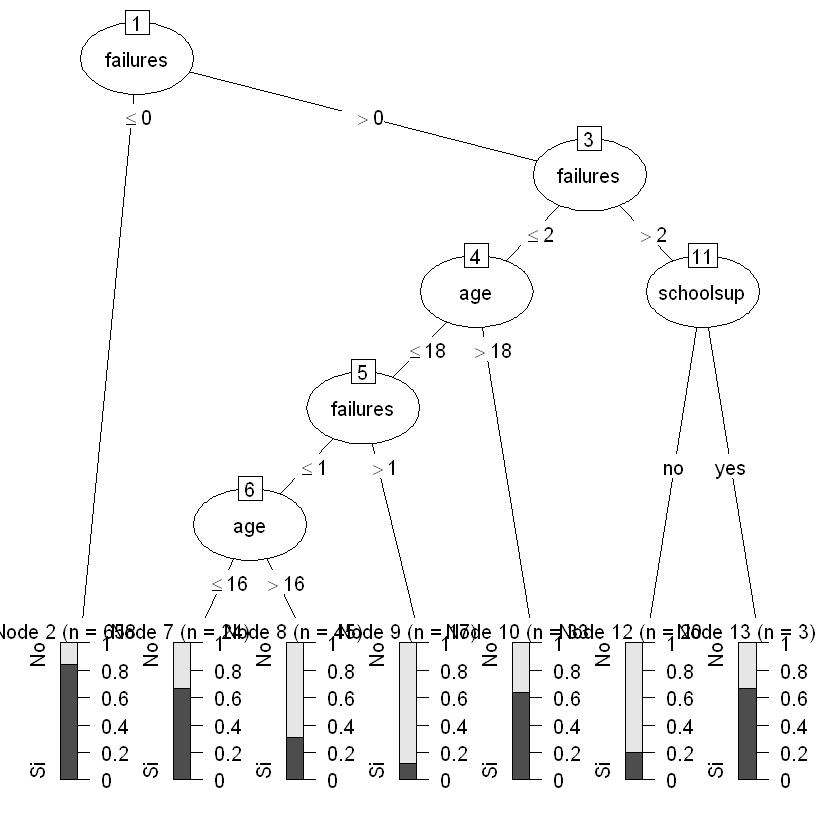

In [34]:
modelP <- C50::C5.0(trainX,trainY,control=C5.0Control(noGlobalPruning=TRUE))
summary(modelP)
plot(modelP)
modelP <- C50::C5.0(trainX,trainY,rules=TRUE, control=C5.0Control(noGlobalPruning=TRUE))
summary(modelP)